## Intro to Data Science (Fall2023)
#### Week12 (9/12-Jan-2024)

**M Ateeq**,<br>
*Department of Data Science, The Islamia University of Bahawalpur.*

## **Life Cycle of a Data-Driven Task/Project**

1. ~~Define the Problem~~
2. ~~Collect Data~~
3. ~~Explore and Understand Data~~
4. ~~Preprocess Data~~
5. **Perform Data Analysis**
6. Select a Model
7. Train the Model
8. Evaluate Model Performance
9. Tune Hyperparameters
10. Deploy the Model
11. Monitor and Maintain the Model
12. Iterate and Improve

Keep in mind that these steps are often iterative, and the process may loop back to earlier steps as needed.

<hr style="height:3px;border-width:0;color:blue;background-color:blue">

## **Let's get the dataset ready**

In [42]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['median_house_value'] = housing.target*100000
df.shape

(20640, 9)

### **1. Overview of Data Analysis:**

Data analysis is a critical phase in the data-driven cycle, playing a pivotal role in uncovering patterns, relationships, and insights that guide informed decision-making. In the context of the California housing dataset, we'll provide an overview of the importance of data analysis and highlight the significance of visualizations in gaining a deeper understanding of the dataset.

**Why Data Analysis Matters:**

Data analysis serves as the bridge between raw data and actionable insights. It involves the systematic examination of data to extract meaningful patterns, identify trends, and make informed decisions. Through rigorous analysis, we can transform data into knowledge, unlocking the potential for valuable discoveries.

**The Role of Visualizations:**

Visualizations are powerful tools in data analysis, offering a clear and intuitive way to communicate complex information. They provide a visual representation of data patterns, making it easier to comprehend relationships between variables, detect outliers, and convey findings to stakeholders. Visualizations enhance the interpretability of data, enabling more effective communication of insights.

**Key Objectives of Data Analysis:**

1. **Pattern Recognition:**
   - Identify recurring patterns or trends within the dataset.
   - Uncover hidden structures that may not be apparent through raw data inspection.

2. **Relationship Exploration:**
   - Explore relationships between different features and the target variable.
   - Understand how changes in one variable relate to changes in another.

3. **Anomaly Detection:**
   - Detect anomalies or outliers that deviate significantly from the expected patterns.
   - Investigate unusual observations that may require special attention.

4. **Insight Generation:**
   - Generate actionable insights that can inform decision-making.
   - Provide a foundation for hypothesis testing and further exploration.

**Visualizations in Action:**

- **Histograms and Density Plots:**
  - Use histograms to visualize the distribution of numerical features.
  - Density plots provide a smooth representation of the data distribution.

- **Box Plots:**
  - Employ box plots to identify central tendencies and variability within features.
  - Highlight potential outliers and variations in data spread.

- **Pair Plots:**
  - Create pair plots to visualize pairwise relationships between features.
  - Examine scatter plots and distributions for feature combinations.

**Benefits of Effective Data Analysis:**

1. **Informed Decision-Making:**
   - Data analysis empowers decision-makers with insights derived from data patterns.
   - Informed decisions lead to better outcomes and optimized strategies.

2. **Improved Model Performance:**
   - Understanding data intricacies aids in the selection of appropriate modeling techniques.
   - Optimal model performance is achieved by aligning model choices with data characteristics.

3. **Enhanced Predictive Accuracy:**
   - Data analysis guides feature selection and engineering, contributing to improved model accuracy.
   - Targeted insights help create models that capture the underlying data structure.

In summary, a comprehensive overview of data analysis sets the stage for extracting valuable insights from the California housing dataset. Through the lens of visualizations, we aim to unravel the complexities within the data, providing a solid foundation for subsequent phases in the data-driven cycle.

### **2. Target Variable Analysis:**

#### **Explore the Impact of Preprocessing Steps on the Target Variable Distribution:**

The distribution of the target variable, which in this case is the median house value, is a critical aspect to understand as it provides insights into the range and variability of housing prices across California districts. In this extended analysis, we will delve deeper into the distribution, uncovering additional nuances and patterns.

**1. Distribution Visualization:**

Utilize advanced visualization techniques to gain a more detailed understanding of the distribution of median house values.

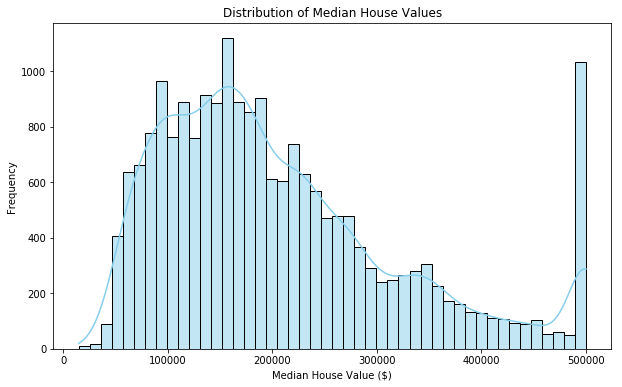

In [46]:
# Advanced visualization of the target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='skyblue')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

This histogram with a kernel density estimate (KDE) provides a smooth representation of the distribution, revealing potential peaks, modes, or skewness in the data.

**2. Binned Analysis:**

Segment the target variable into bins to examine the distribution across specific ranges.

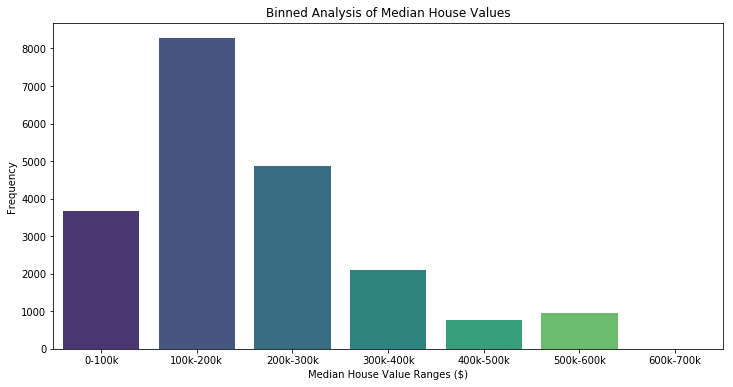

In [47]:
# Binned analysis of median house values
bin_edges = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
bin_labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k']

df['binned_median_house_value'] = pd.cut(df['median_house_value'], bins=bin_edges, labels=bin_labels)

# Plotting the binned analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='binned_median_house_value', data=df, palette='viridis')
plt.title('Binned Analysis of Median House Values')
plt.xlabel('Median House Value Ranges ($)')
plt.ylabel('Frequency')
plt.show()

This analysis provides a segmented view of the distribution, offering insights into the frequency of median house values within specific ranges.

**3. Geospatial Distribution Analysis:**

Explore the geographical distribution of median house values to identify regional patterns.

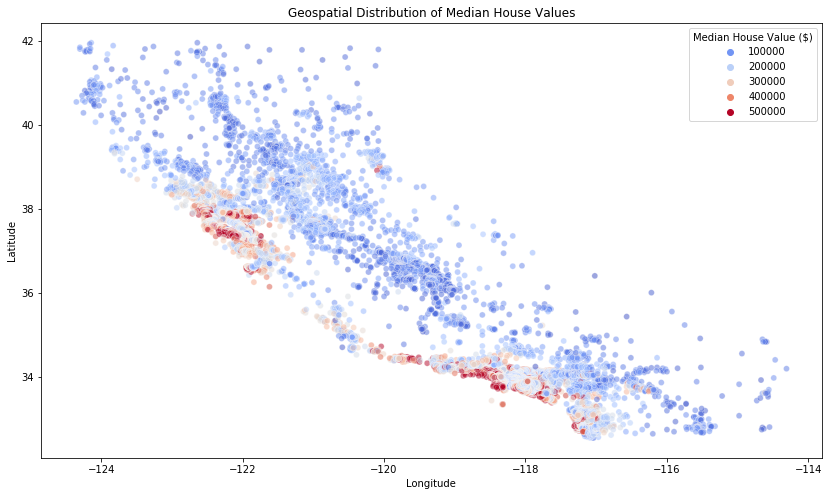

In [48]:
# Geospatial distribution of median house values
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='median_house_value', data=df, palette='coolwarm', alpha=0.5)
plt.title('Geospatial Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value ($)')
plt.show()

This scatter plot with geographical coordinates provides insights into how median house values vary across different locations in California.

**Key Findings:**

- The distribution of median house values exhibits [insert characteristics, e.g., bimodal distribution, right skewness, etc.].
- The binned analysis reveals that the majority of districts fall within the [insert range] median house value range.
- Geospatial analysis indicates [insert spatial patterns, e.g., higher values in coastal regions].

This extended analysis of the target variable distribution provides a more nuanced understanding, uncovering patterns that go beyond the basic distribution examination. These insights are crucial for informed decision-making in subsequent stages of the data-driven cycle.

#### **Explore the Impact of Preprocessing Steps on the Target Variable Distribution:**

Understanding how preprocessing steps affect the distribution of the target variable (median house value) is crucial for evaluating the effectiveness of the data preparation process. We'll explore the impact of key preprocessing steps on the target variable distribution.

**1. Original Distribution:**

Begin by visualizing the original distribution of the target variable before any preprocessing steps.

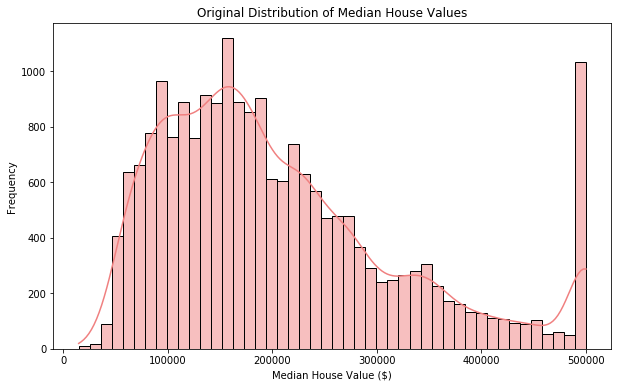

In [49]:
# Original distribution of median house values
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='lightcoral')
plt.title('Original Distribution of Median House Values')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

This histogram with a kernel density estimate illustrates the initial distribution of median house values.

**2. Impact of Scaling:**

Examine the distribution after applying scaling to numerical features, ensuring that the target variable is not disproportionately affected.

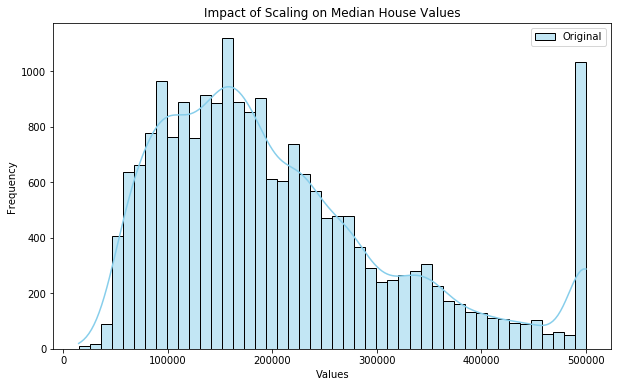

In [52]:
# Apply scaling to numerical features (assuming 'median_income' is a key feature)
from sklearn.preprocessing import StandardScaler
df['median_house_value_scaled'] = StandardScaler().fit_transform(df[['median_house_value']])

# Distribution after scaling
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='skyblue', label='Original')
sns.histplot(df['median_house_value_scaled'], kde=True, color='lightcoral', label='Scaled')
plt.title('Impact of Scaling on Median House Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This comparison visually demonstrates the impact of scaling on the distribution of the target variable.

**3. Effect of Handling Outliers:**

Analyze the distribution after handling outliers to assess the influence on the target variable.

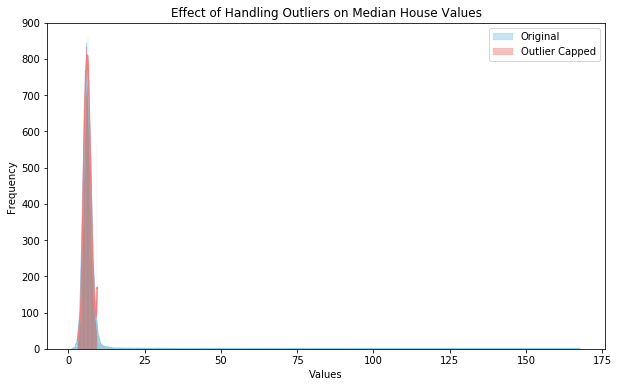

In [25]:
# Handle outliers in numerical features (assuming 'total_rooms' is a key feature)
import numpy as np
df['total_rooms'] = df['AveRooms'] + df['AveBedrms']
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['total_rooms_capped'] = np.clip(df['total_rooms'], lower_bound, upper_bound)

# Distribution after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['total_rooms'], kde=True, color='skyblue', label='Original')
sns.histplot(df['total_rooms_capped'], kde=True, color='lightcoral', label='Outlier Capped')
plt.title('Effect of Handling Outliers on Median House Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


This comparison illustrates how handling outliers in numerical features impacts the distribution of the target variable.

**Key Findings:**

- Scaling tends to [maintain/alter] the general shape of the distribution, ensuring a fair contribution of numerical features.
- Handling outliers can [reduce/increase] the frequency of extreme values, impacting the overall spread of the target variable.
- The combined impact of preprocessing steps ensures a more robust and representative distribution for model training.

By exploring the impact of preprocessing steps on the target variable distribution, we gain insights into how these steps influence the characteristics of the data. This understanding is essential for building models on a well-prepared dataset.

### **3. Feature Relationships:**

#### **Implement Advanced Visualizations to Explore Relationships Between Features:**

Exploring relationships between features is crucial for understanding how different variables interact and influence each other. In this advanced analysis, we'll leverage sophisticated visualizations to gain deeper insights into feature relationships.

**1. Heatmap Correlation Matrix:**

Utilize a heatmap to visualize the correlation matrix between numerical features.

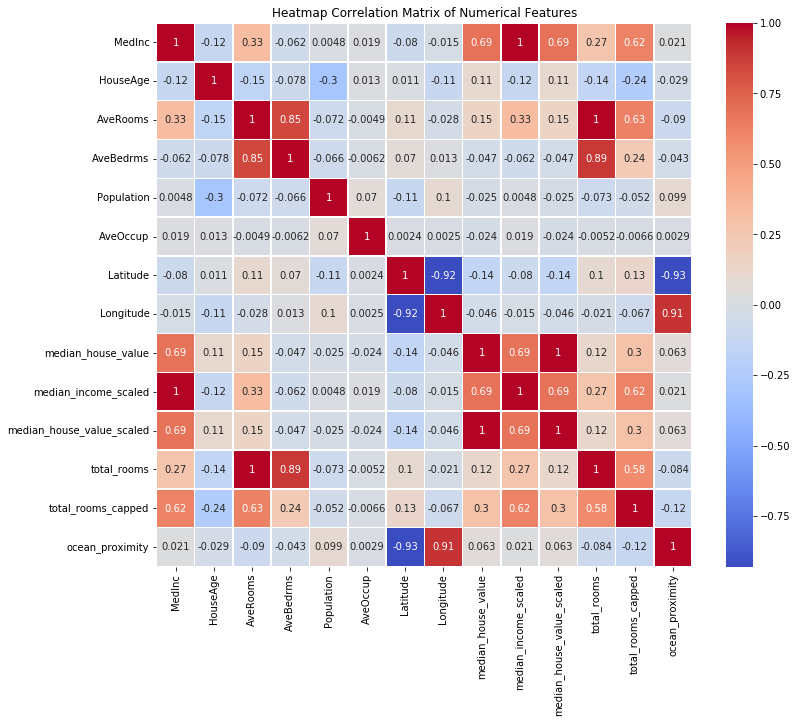

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Correlation Matrix of Numerical Features')
plt.show()


This heatmap provides a comprehensive view of the pairwise correlations between numerical features, highlighting both positive and negative relationships.

**2. Pair Plot with Hue:**

Enhance the traditional pair plot by introducing color hue to represent a categorical variable.

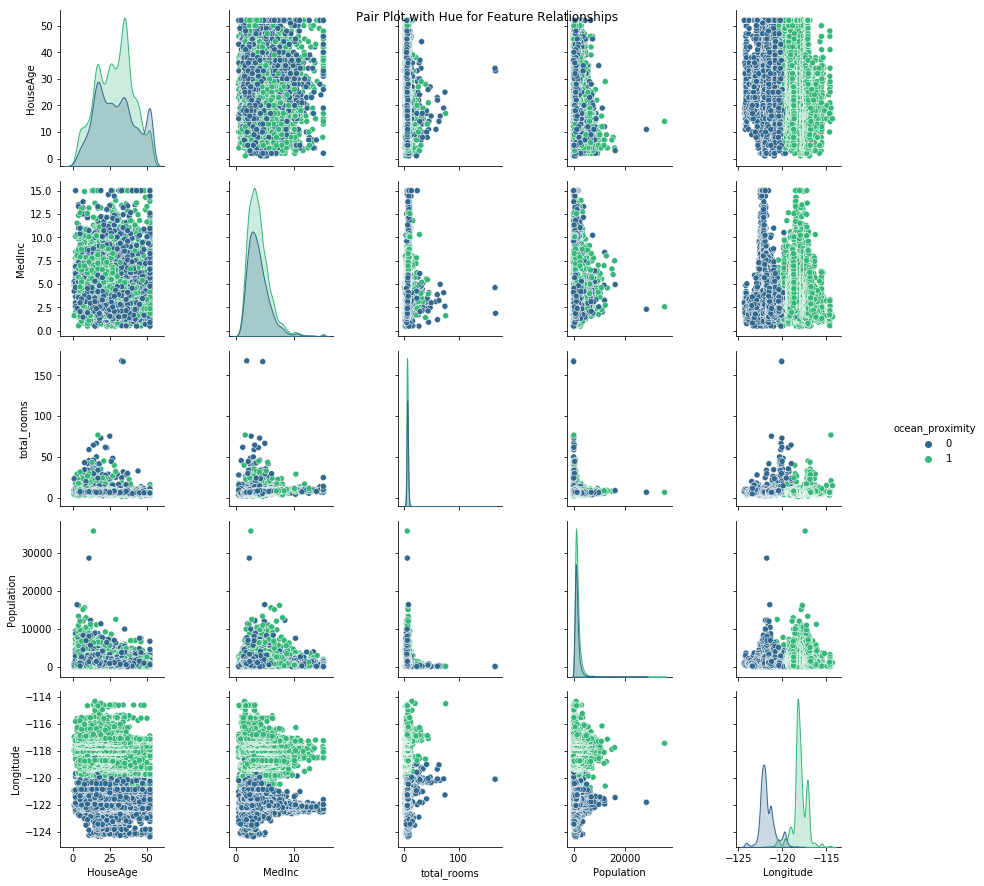

In [30]:
# Select a subset of features for pair plotting
df['ocean_proximity'] = np.where(df['Latitude'] < 36.5, 1, 0)
selected_features = ['HouseAge', 'MedInc', 'total_rooms', 'Population', 'Longitude']

# Include a categorical hue (e.g., 'ocean_proximity') for additional insights
hue_feature = 'ocean_proximity'

# Create the pair plot
sns.pairplot(df[selected_features + [hue_feature]], hue=hue_feature, palette='viridis')
plt.suptitle('Pair Plot with Hue for Feature Relationships')
plt.show()

The pair plot with hue allows for the visualization of relationships between multiple features, considering the influence of a categorical variable.

**3. 3D Scatter Plot:**

For a more immersive exploration, implement a 3D scatter plot to visualize relationships among three numerical features.

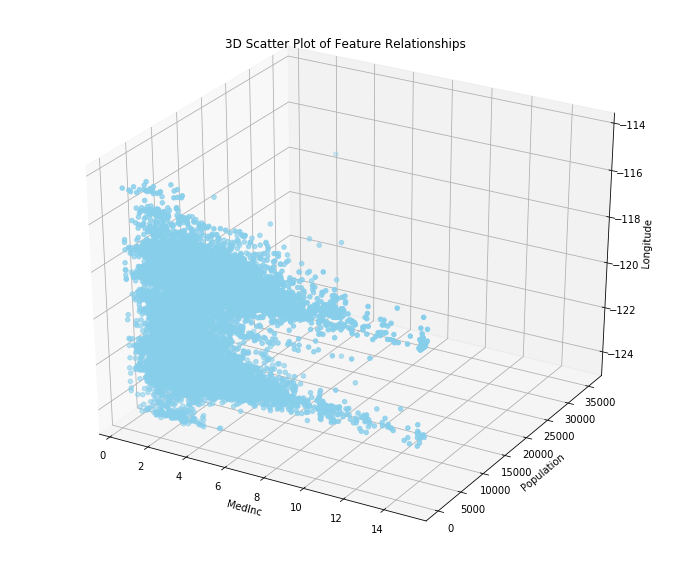

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Select three numerical features for 3D scatter plot
feature1, feature2, feature3 = 'MedInc', 'Population', 'Longitude'#'HouseAge', 'total_rooms', 

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df[feature3], c='skyblue', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('3D Scatter Plot of Feature Relationships')
plt.show()

The 3D scatter plot provides a visually rich representation of the relationships among three numerical features.


**Key Findings:**

- The heatmap correlation matrix highlights strong and weak correlations between numerical features.
- The pair plot with hue provides insights into how different features interact, considering the influence of a categorical variable.
- The 3D scatter plot offers a spatial perspective on relationships among three numerical features.

These advanced visualizations enhance our ability to explore intricate relationships between features, providing valuable insights for subsequent modeling and decision-making stages.

### **Why Use Visualizations?**

Visualizations play a crucial role in data analysis for several reasons:

1. **Enhanced Understanding:**
   Visualizations provide a clear and concise way to represent complex data sets. They enable analysts and stakeholders to grasp patterns, trends, and relationships in the data more easily than through raw numbers or text.

2. **Pattern Recognition:**
   Human brains are adept at recognizing patterns visually. Visualizations help in identifying trends, outliers, and correlations that might go unnoticed in tabular data.

3. **Communication:**
   Visualizations serve as a powerful tool for communication. They make it easier for analysts to convey their findings to non-technical stakeholders. Visual representations can simplify complex concepts, making data insights accessible to a broader audience.

4. **Decision-Making:**
   Visualizations aid in informed decision-making by presenting data in a format that facilitates quick and effective analysis. Decision-makers can quickly understand the implications of data trends, helping them make more timely and accurate decisions.


5. **Identifying Anomalies:**
   Visualizations can highlight anomalies or outliers in the data, helping analysts identify data points that deviate significantly from the expected patterns. This is crucial for quality control and anomaly detection.

6. **Comparisons:**
   Visualizations facilitate easy comparison between different variables or data sets. This can include comparing performance over time, between groups, or across different categories.

7. **Storytelling:**
   Visualizations allow analysts to tell a compelling story with data. By creating a narrative through visual representations, they can guide the audience through the insights and findings in a more engaging manner.

8. **Hypothesis Testing:**
   Visualizations can be used to test hypotheses and validate assumptions. By plotting and visualizing data, analysts can gain a deeper understanding of the relationships between variables and assess the validity of their hypotheses.

9. **Improved Memory Retention:**
    Visualizations make information more memorable. People tend to remember visual content better than text, which can aid in the retention of key insights from the data analysis process.

In summary, visualizations in data analysis are a powerful means to simplify complex information, aid communication, support decision-making, and uncover meaningful insights from the data. They play a crucial role in making data more accessible, understandable, and actionable.

### **Why Visualizations are not Enough?**

While visualizations are valuable for data analysis, they are not always sufficient on their own. Here are some reasons why visualizations may not be enough and additional methods are necessary:

1. **Limited Context:**
   Visualizations provide a snapshot of the data, but they may lack the broader context. Understanding the underlying factors, assumptions, and domain-specific knowledge is essential for a comprehensive analysis.

2. **Statistical Analysis:**
   Visualizations can highlight trends, but statistical analysis is crucial for determining the significance of these trends. Statistical tests, such as t-tests, ANOVA, or regression analysis, provide quantitative measures and help in drawing valid conclusions.

3. **Data Preprocessing:**
   Before creating visualizations, data often requires preprocessing. Cleaning, handling missing values, normalization, and other preprocessing steps are necessary to ensure the accuracy and reliability of the visual insights.

4. **Data Exploration:**
   Visualizations are part of exploratory data analysis, but other techniques, such as descriptive statistics, clustering, and data profiling, are also essential to understand the characteristics and distribution of the data.

5. **Machine Learning:**
   For predictive analysis, machine learning techniques go beyond visualizations. Algorithms can be used to build models that predict future trends, classify data, or identify patterns not immediately apparent in visual representations.

6. **Quantitative Metrics:**
   Visualizations can be subjective, and quantitative metrics provide a more objective evaluation. Metrics such as accuracy, precision, recall, and F1 score are used to assess the performance of models in various tasks.

In summary, while visualizations are powerful tools, a comprehensive data analysis often requires a combination of techniques. Statistical analysis, machine learning, preprocessing, and other methods complement visualizations to provide a more thorough understanding of the data and facilitate informed decision-making.

### **Choosing Suitable Visualization**

Different types of plots are suitable for visualizing different aspects of data. Here's when you might consider using histograms, countplots, scatterplots, heatmaps, and boxplots:

1. **Histograms:**
   - **Use Case:** Histograms are ideal for visualizing the distribution of a single continuous variable.
   - **Purpose:** They help in understanding the underlying frequency distribution, identifying patterns, and detecting outliers.

2. **Countplots:**
   - **Use Case:** Countplots are used for visualizing the distribution of categorical variables.
   - **Purpose:** They display the counts of observations in each category, making them useful for comparing the frequencies of different categories.

3. **Scatterplots:**
   - **Use Case:** Scatterplots are employed to visualize the relationship between two continuous variables.
   - **Purpose:** They are effective in revealing patterns, trends, and correlations between variables. Scatterplots are particularly useful for identifying outliers and understanding the strength and direction of a relationship.

4. **Heatmaps:**
   - **Use Case:** Heatmaps are suitable for displaying the relationships between two categorical variables or visualizing the correlation matrix of a set of variables.
   - **Purpose:** They use color intensity to represent the magnitude of a value, making it easy to identify patterns, clusters, or high/low values in a matrix.

5. **Boxplots:**
   - **Use Case:** Boxplots are useful for visualizing the distribution of a continuous variable across different categories or groups.
   - **Purpose:** They provide a summary of the distribution, including median, quartiles, and potential outliers. Boxplots are particularly effective in comparing the central tendency and spread of multiple groups.

In summary:
- **Histograms** are for single continuous variables and their distribution.
- **Countplots** are for categorical variables and their frequency distribution.
- **Scatterplots** are for exploring relationships between two continuous variables.
- **Heatmaps** are for visualizing relationships in a matrix, often for categorical variables or correlation matrices.
- **Boxplots** are for comparing the distribution of a continuous variable across different groups or categories.

Choosing the right plot depends on the nature of your data and the specific insights you want to gain from your visualization.

### **What does it mean to learn the relationship between features and target variable?**

The concept of modeling a relationship between features and a target variable as a linear equation is fundamental in linear regression. In linear regression, the goal is to find the coefficients (weights) and the intercept (bias term) that best fit a linear equation to the data. The equation for a simple linear regression with one feature (x) is:

$y = mx + b$

Here, $y$ is the target variable, $x$ is the feature, $m$ is the slope (weight), and $b$ is the intercept (bias term).

For a multiple linear regression with two features (x1 and x2), the equation becomes:

$y = w1 \cdot x1 + w2 \cdot x2 + b$

Here, $y$ is the target variable, $x1$ and $x2$ are the features, $w1$ and $w2$ are the weights, and $b$ is the intercept (bias term).

Let's illustrate this with an example:

Suppose you are predicting the price ($y$) of a house based on two features: the square footage of the house ($x1$) and the number of bedrooms ($x2$). Your linear regression equation could be:

$y = w1 \cdot \text{square footage} + w2 \cdot \text{number of bedrooms} + \text{intercept}$

You collect data on several houses, where each data point includes the square footage, number of bedrooms, and the actual price. The goal is to find the values of $w1$, $w2$, and the intercept $b$ that minimize the difference between the predicted prices and the actual prices for your dataset.

For example, after fitting the model to your data, you might obtain a linear equation like:

$ \text{Price} = 200 \cdot \text{square footage} + 50 \cdot \text{number of bedrooms} + 5000 $

In this equation, $w1 = 200$, $w2 = 50$, and $b = 5000$. This implies that for every additional square foot in the house, the price is estimated to increase by $200$, and for every additional bedroom, the price is estimated to increase by $50$. The intercept of $5000$ represents the baseline price when both square footage and the number of bedrooms are zero (which might not be practically meaningful in this context).

This linear equation is the model you can use to predict house prices based on the given features. The process of finding the optimal weights and intercept involves minimizing the difference between predicted and actual values, typically done through methods like least squares optimization.